In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.font_manager as fm

In [2]:
# https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1J20003&conn_path=i3
consumer_price_index = pd.read_csv('소비자물가지수_2020100__20231116021430.csv', encoding = 'cp949')

In [3]:
consumer_price_index.head()

,시도별,2023.10,2023.09,2023.08,2023.07,2023.06,2023.05,2022,2021,2020,...,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998
0,전국,113.37,112.99,112.33,111.2,111.12,111.13,107.71,102.5,100.0,...,78.01,76.081,74.413,72.418,69.908,67.534,65.719,63.151,61.756,61.258


In [4]:
price2023 = consumer_price_index.columns[consumer_price_index.columns.str.contains('2023')]
consumer_price_index['2023'] = np.mean(consumer_price_index[price2023], axis = 1)

In [5]:
consumer_price_index.head()

,시도별,2023.10,2023.09,2023.08,2023.07,2023.06,2023.05,2022,2021,2020,...,2006,2005,2004,2003,2002,2001,2000,1999,1998,2023
0,전국,113.37,112.99,112.33,111.2,111.12,111.13,107.71,102.5,100.0,...,76.081,74.413,72.418,69.908,67.534,65.719,63.151,61.756,61.258,112.023333


In [6]:
consumer_price_index.drop(price2023, axis = 1, inplace = True)

In [7]:
consumer_price_index.head()

,시도별,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2006,2005,2004,2003,2002,2001,2000,1999,1998,2023
0,전국,107.71,102.5,100.0,99.466,99.086,97.645,95.783,94.861,94.196,...,76.081,74.413,72.418,69.908,67.534,65.719,63.151,61.756,61.258,112.023333


In [8]:
consumer_price_index_T = consumer_price_index.T.sort_index(ascending = True)
consumer_price_index_T.drop('시도별', axis = 0, inplace = True)
consumer_price_index_T

,0
1998,61.258
1999,61.756
2000,63.151
2001,65.719
2002,67.534
2003,69.908
2004,72.418
2005,74.413
2006,76.081
2007,78.01


In [9]:
consumer_price_index_T = consumer_price_index_T.astype(float)

In [10]:
# https://www.dgbfnlife.com/BA/BA_A170.do
deposit_rate = pd.read_csv('정기예금이율.csv')
deposit_rate.head()

,values
0,2023-11-01\t2023-11-30\t3.00%
1,2023-10-01\t2023-10-31\t3.00%
2,2023-09-01\t2023-09-30\t3.00%
3,2023-08-01\t2023-08-31\t3.00%
4,2023-07-01\t2023-07-31\t3.00%


In [11]:
deposit_rate = deposit_rate['values'].str.split('\t', expand = True)

In [12]:
deposit_rate.columns = ['start', 'end', 'rate']

In [13]:
deposit_rate['rate'] = deposit_rate['rate'].str.replace('%', '').astype(float)

In [14]:
deposit_rate['start'] = pd.to_datetime(deposit_rate['start'])
deposit_rate['end'] = pd.to_datetime(deposit_rate['end'])

In [15]:
deposit_rate['year'] = deposit_rate['start'].dt.year

In [16]:
deposit_rate_agg = deposit_rate.groupby(['year'])['rate'].agg('mean').reset_index()
deposit_rate_agg.head()

,year,rate
0,1988,10.00
1,1993,8.75
2,1995,9.00
3,1999,6.68
4,2001,5.45


In [17]:
scaler = MinMaxScaler()
consumer_price_index_T[0] = scaler.fit_transform(consumer_price_index_T[0].values.reshape(-1, 1))
scaler = MinMaxScaler()
deposit_rate_agg['rate'] = scaler.fit_transform(deposit_rate_agg['rate'].values.reshape(-1, 1))

In [18]:
plt.rcParams['font.family'] = 'NanumGothic'
import warnings
warnings.filterwarnings('ignore')

In [19]:
# # 설치된 폰트 출력
# font_list = [font.name for font in fm.fontManager.ttflist]
# font_list

In [20]:
plt.rcParams['font.family'] = 'Apple SD Gothic Neo'

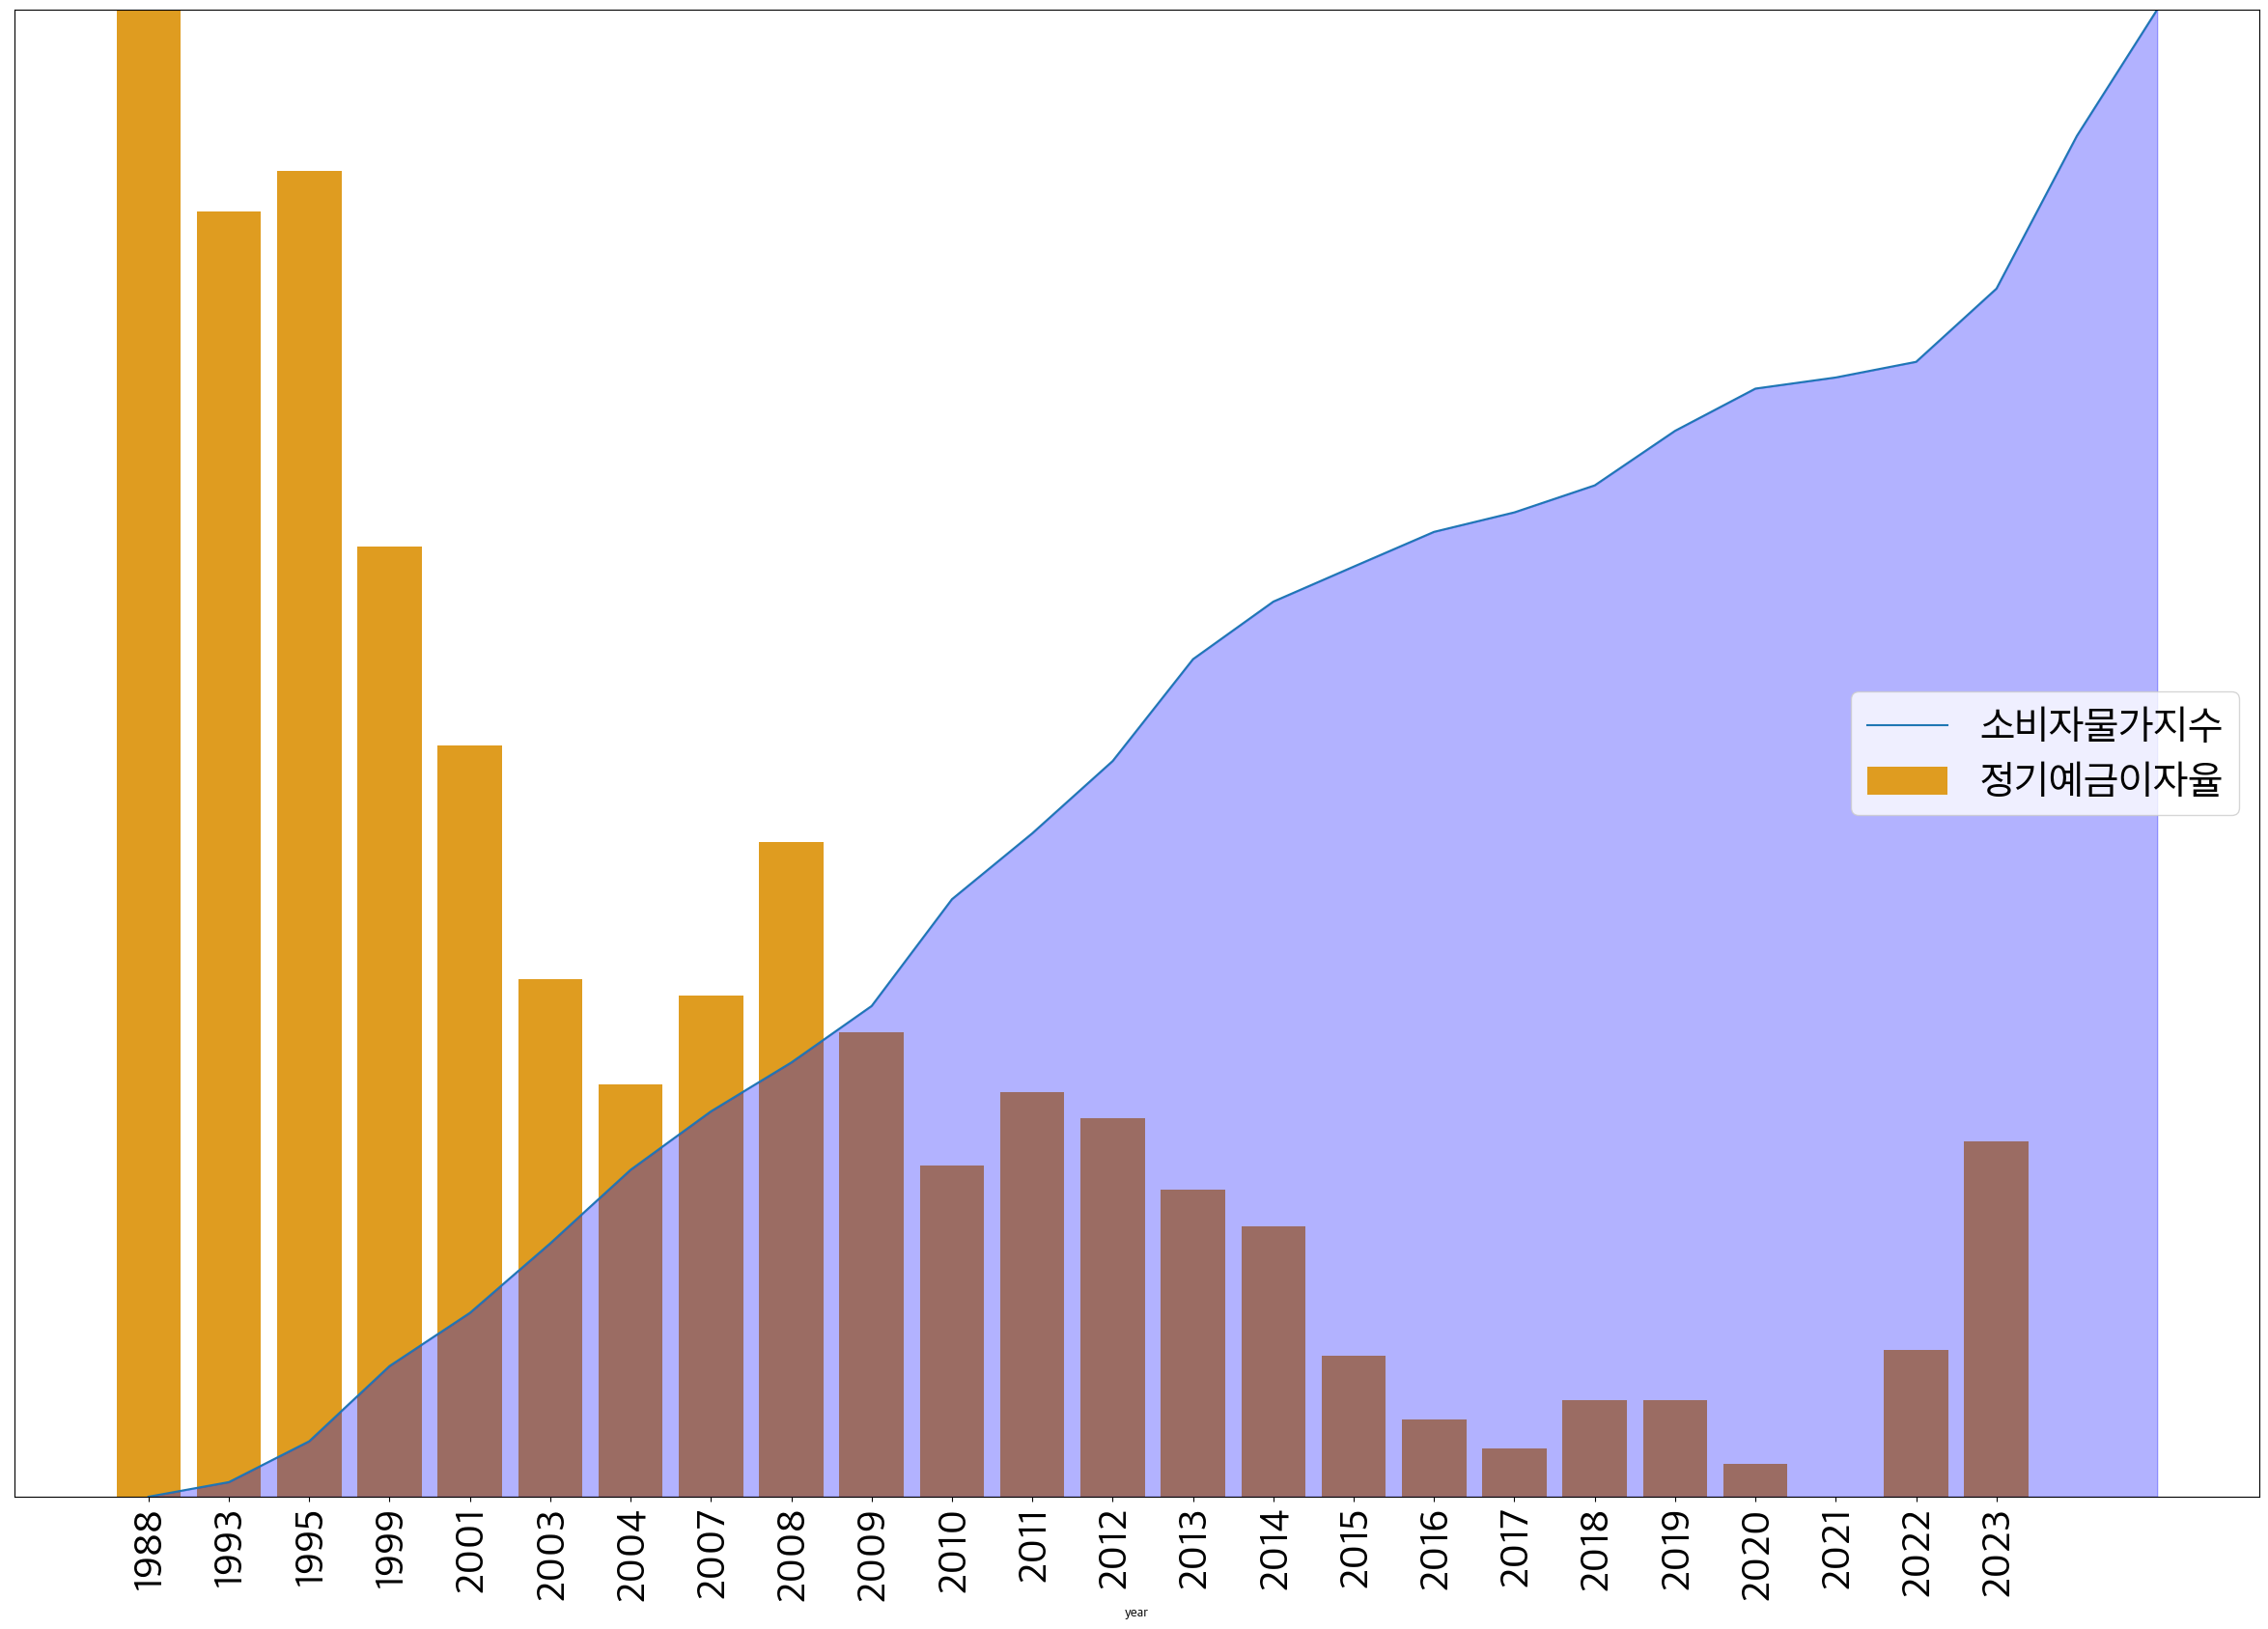

In [21]:
plt.figure(figsize=(30, 20))
sns.barplot(x=deposit_rate_agg['year'], y=deposit_rate_agg['rate'], label='정기예금이자율', color = 'orange')
sns.lineplot(x=consumer_price_index_T.index, y=consumer_price_index_T[0], label='소비자물가지수')
plt.fill_between(consumer_price_index_T.index.values, consumer_price_index_T[0].values, color='b', alpha=0.3)
plt.ylim(min(consumer_price_index_T[0]), max(consumer_price_index_T[0]))
#plt.xlabel('Figure 1.1 소비자물가지수와 정기예금이자율 추이', fontsize = 50)
plt.ylabel('')
plt.yticks([])
plt.xticks(fontsize=30, rotation=90)
plt.legend(fontsize = 30)
plt.show()

In [22]:
# 자료: "Artificial Intelligence(AI) Market - Global Forecast To 2026", MarketandMarkets(2021)
# https://www.google.com/search?q=%EA%B5%AD%EB%82%B4+%EA%B8%88%EC%9C%B5+%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5+%EC%8B%9C%EC%9E%A5+%EA%B7%9C%EB%AA%A8&tbm=isch&ved=2ahUKEwiUj4el2MeCAxUEyTQHHXtcCQMQ2-cCegQIABAA&oq=%EA%B5%AD%EB%82%B4+%EA%B8%88%EC%9C%B5+%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5+%EC%8B%9C%EC%9E%A5+%EA%B7%9C%EB%AA%A8&gs_lcp=CgNpbWcQAzoECCMQJ1C3CFjSEGDOEmgAcAB4AIABlgGIAfwIkgEDMC44mAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=iptVZZSiLYSS0-kP-7ilGA&bih=700&biw=1055&rlz=1C5CHFA_enKR1003KR1003#imgrc=z9Tt9BeaMsUGfM